## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Fall 2019


# Homework 1

- **100 points [6% of your final grade]**
- **Due Wednesday, September 18 by 11:59pm**

*Goals of this homework:* There are two objectives of this homework: i) collect data from the web, clean it, and then make some observations based on exploratory data analysis; and ii) understand and implement the classic apriori algorithm to find the association rules in a movie rating dataset.

*Submission instructions:* You should post your notebook to ecampus (look for the homework 1 assignment there). Please name your submission **your-uin_hw1.ipynb**, so for example, my submission would be something like **555001234_hw1.ipynb**. Your notebook should be fully executed when you submit ... so run all the cells for us so we can see the output, then submit that. 

## (10 points) Part 1a: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going to focus only on UFO sightings in Texas, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlTX.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. In particular, we're going to use the Python libraries **[requests](http://docs.python-requests.org/en/master/)** and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [2198]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import csv
import numpy as np

url = "http://www.nuforc.org/webreports/ndxlTX.html"
page = requests.get(url)
pagetext = page.text

soup = BeautifulSoup(pagetext, 'html.parser')

count=1
table ={}
columnNames = []
    
for row in soup.find_all('tr'):
    temp = []
    for c in row.find_all('th'):
        columnNames.append(c.text)
        temp.append(c.text)
    for c in row.find_all('td'):
        temp.append(c.text)
    table[count]=temp
    count+=1

In [2199]:
df=pd.DataFrame.from_dict(table,orient='index',columns = columnNames)
df = df.drop(1) #delete row that is a copy of the column names
#save dataframe to a csv file
df.to_csv (r'ufo_texas.csv', index = None, header=True)

Once you have your local csv file, you should read it in and then issue the .head() command.

In [2200]:
data = pd.read_csv("ufo_texas.csv")
data.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,9/10/19 22:10,Lake Worth,TX,Light,30 seconds,Two bright objects moving in formation.,9/12/19
1,9/6/19 21:00,League City,TX,Formation,2 minutes,As we were heading northbound on Hobbs Road in...,9/12/19
2,9/5/19 07:30,Weatherford,TX,Cylinder,30 seconds,"Re-entry moving W, W of Weatherford, TX.",9/12/19
3,9/4/19 23:00,Ozona,TX,Light,12 seconds,Light almost like a plane flying quickly above...,9/6/19
4,9/1/19 20:30,League City,TX,Circle,5 minutes,8-9 Orange glowing objects in single file line...,9/6/19


## (10 points) Part 1b: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Report the basic statistics of the duration in your new 'validated' dataset (report maximum, minimum, mean, and standard deviation values of duration). At last, plot a boxplot of the duration (in seconds) in your 'validated' dataset.

In [2201]:
dataValidated = data.copy(deep=True)

In [2202]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
import re

def seconds(t):
    z = re.match('^\d+\s+(seconds|second)',t)
    if('None' not in str(type(z))):
        return(z.group(0))

def minutes(t):
    z = re.match('^\d+\s+(minutes|minute)',t)
    if('None' not in str(type(z))):
        return(z.group(0))
    
def hours(t):
    z = re.match('^\d+\s+(hours|hour)',t)
    if('None' not in str(type(z))):
        return(z.group(0))

def days(t):
    z = re.match('^\d+\s+(days|day)',t)
    if('None' not in str(type(z))):
        return(z.group(0))
    
def weeks(t):
    z = re.match('^\d+\s+(week|weeks)',t)
    if('None' not in str(type(z))):
        return(z.group(0))

def getValidRows(dataValidated):
    validRows = []
    for index,row in dataValidated.iterrows(): 
        if(type(row['Duration']) != 'float'):
            if seconds(str(row['Duration'])):
                validRows.append(index)
                #print(seconds(str(row['Duration'])))
            if minutes(str(row['Duration'])):
                validRows.append(index)
                #print(minutes(str(row['Duration'])))
            if hours(str(row['Duration'])):
                validRows.append(index)
                #print(hours(str(row['Duration'])))
            if days(str(row['Duration'])):
                validRows.append(index)
            if weeks(str(row['Duration'])):
                validRows.append(index)
    return validRows


In [2203]:
rows = getValidRows(dataValidated)

In [2204]:
#Drop invalid entries
        
for index, row in dataValidated.iterrows():
    if index not in rows:
        dataValidated.drop(index,inplace=True)


In [2205]:
dataValidated.shape

(2540, 7)

In [2206]:
dataValidated.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,9/10/19 22:10,Lake Worth,TX,Light,30 seconds,Two bright objects moving in formation.,9/12/19
1,9/6/19 21:00,League City,TX,Formation,2 minutes,As we were heading northbound on Hobbs Road in...,9/12/19
2,9/5/19 07:30,Weatherford,TX,Cylinder,30 seconds,"Re-entry moving W, W of Weatherford, TX.",9/12/19
3,9/4/19 23:00,Ozona,TX,Light,12 seconds,Light almost like a plane flying quickly above...,9/6/19
4,9/1/19 20:30,League City,TX,Circle,5 minutes,8-9 Orange glowing objects in single file line...,9/6/19


In [2207]:
for index,row in dataValidated.iterrows(): 
    if 'second' in row['Duration']:
        res = [int(i) for i in str(row['Duration']).split() if i.isdigit()]
        #durations.append(res[0])
    if 'minute' in row['Duration']:
        res = [int(i) for i in str(row['Duration']).split() if i.isdigit()]
        row['Duration'] = str(60*res[0]) + " " + "seconds"
        #durations.append(60*res[0])
    if 'hour' in row['Duration']:
        res = [int(i) for i in str(row['Duration']).split() if i.isdigit()]
        row['Duration'] = str(60*60*res[0]) + " " + "seconds"
        #durations.append(60*60*res[0])
    if 'day' in row['Duration']:
        res = [int(i) for i in str(row['Duration']).split() if i.isdigit()]
        row['Duration'] = str(24*60*60*res[0]) + " " + "seconds"
        #durations.append(24*60*60*res[0])
    if 'week' in row['Duration']:
        res = [int(i) for i in str(row['Duration']).split() if i.isdigit()]
        row['Duration'] = str(7*24*60*60*res[0]) + " " + "seconds"
        #durations.append(7*24*60*60*res[0])     

In [2208]:
durations=[]
durationDF1=dataValidated['Duration']
for dur in durationDF1:
    t = dur.split()[0]
    #print(t)
    durations.append(float(dur.split()[0]))

In [2209]:
dataValidated.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,9/10/19 22:10,Lake Worth,TX,Light,30 seconds,Two bright objects moving in formation.,9/12/19
1,9/6/19 21:00,League City,TX,Formation,120 seconds,As we were heading northbound on Hobbs Road in...,9/12/19
2,9/5/19 07:30,Weatherford,TX,Cylinder,30 seconds,"Re-entry moving W, W of Weatherford, TX.",9/12/19
3,9/4/19 23:00,Ozona,TX,Light,12 seconds,Light almost like a plane flying quickly above...,9/6/19
4,9/1/19 20:30,League City,TX,Circle,300 seconds,8-9 Orange glowing objects in single file line...,9/6/19


In [2210]:
# your code here
# total rows in original dataset
print('Original data set had',data.shape[0] ,'rows')
# valid rows in your new 'validated' dataset
print('Validates data set has',dataValidated.shape[0] ,'rows')

Original data set had 5046 rows
Validates data set has 2540 rows


In [2211]:
dataValidated['Time'] = durations

Maximum duration: 604800.0
Minimum duration: 1.0
Mean duration: 1528.982283464567
Standard Deviation: 16169.223413073483
Median: 120.0


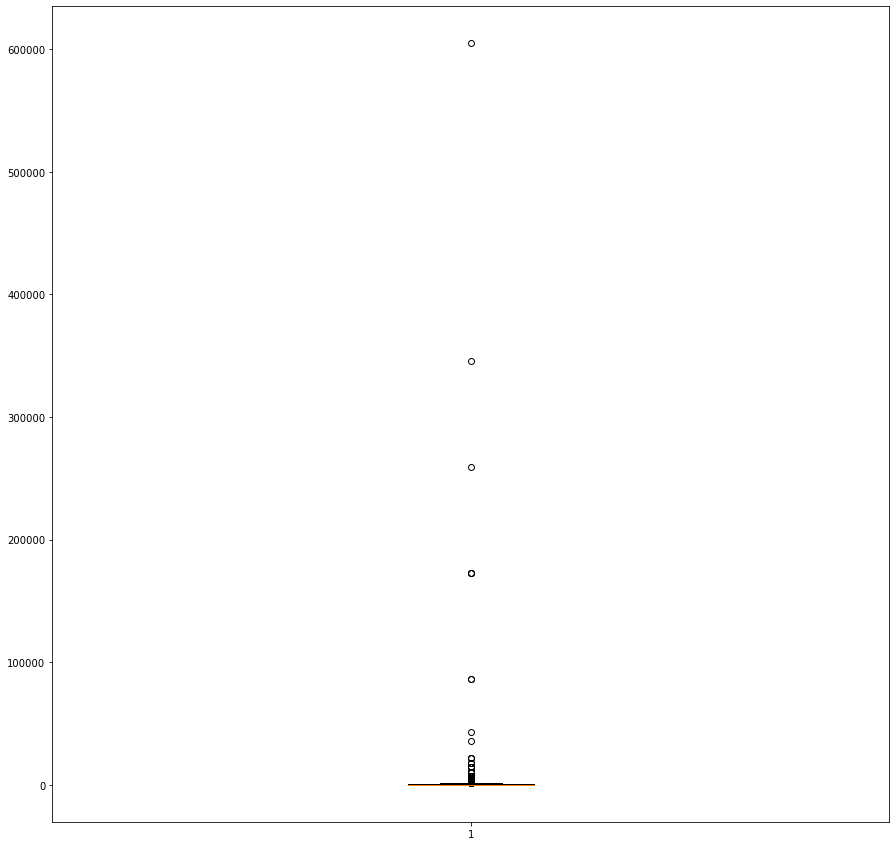


count      2540.000000
mean       1528.982283
std       16169.223413
min           1.000000
25%          20.000000
50%         120.000000
75%         600.000000
max      604800.000000
Name: Time, dtype: float64


In [2212]:
# your code here
# report the basic statistics of duration in 'validated' dataset
#max, min,mean,standard deviation

import matplotlib.pyplot as plt
import statistics
print('Maximum duration:',float(max(durations)) )
print('Minimum duration:',float(min(durations)) )
print('Mean duration:',statistics.mean(durations) )
print('Standard Deviation:',statistics.stdev(durations) )
print('Median:',statistics.median(durations))

# boxplot code here
plt.figure(figsize=(15,15))
plt.boxplot(durations)

plt.show()
print()


print(dataValidated['Time'].describe())

## (30 points) Part 1c: Can we do better?
Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so **make detailed notes of what decisions you are making and why**.

In [2213]:
dataClean = data.copy(deep=True)
dataClean['Duration'].replace('',np.nan,inplace=True)

In [2214]:
dataClean.shape

(5046, 7)

In [2215]:
dataClean.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,9/10/19 22:10,Lake Worth,TX,Light,30 seconds,Two bright objects moving in formation.,9/12/19
1,9/6/19 21:00,League City,TX,Formation,2 minutes,As we were heading northbound on Hobbs Road in...,9/12/19
2,9/5/19 07:30,Weatherford,TX,Cylinder,30 seconds,"Re-entry moving W, W of Weatherford, TX.",9/12/19
3,9/4/19 23:00,Ozona,TX,Light,12 seconds,Light almost like a plane flying quickly above...,9/6/19
4,9/1/19 20:30,League City,TX,Circle,5 minutes,8-9 Orange glowing objects in single file line...,9/6/19


In [2216]:
units = r'(mins?|hours?|secs?|hrs?|m|s|h|minutes?|seconds?|days?|days?|weeks?)'
around = r'(?:\<|\>|\~|\+|plus|app\.|approx\.|about|abt|app|approx|apprx|approximately|\,|less than|\?)'
rangeWord = r'(\-|to|\/|and|\&|or)+'
digits = r'(one|two|three|four|five|six|seven|eight|nine|ten|fifteen|twenty|thirty|forty five|forty-five|half)'

base = r'^(\d+)\s*'+ units #1 day
regex1 = r'^'+ around + r'\s*(\d+)\s*'+ units #approx 1 min

#regex2 = r'^(\d+)\s*'+ units + around #3 hrs approximately; redundant --> base case

regex3 = r'^'+ around+ r'?' +'(\d+)\s*' + rangeWord + r'\s*(\d+)\s*'+ units #1-3min
regex4 = r'^'+ around+ r'?' + '(\d+)\s*' + units + r'\s*' + rangeWord + r'\s*(\d+)\s*'+ units # 1min - 3min
regex5 = r'^(\d+)\s*(\:+)\s*(\d+)\s*(\:+)\s*(\d+)'#00:04:56
regex6 = r'^(\d+)\s*'+ around + r'\s*' + units #30 plus mins
regex7 = r'^(\d+)\s*(:+)\s*(\d+)'+ units + r'+' #1:00 mins
regex8 = r'^(\d+)(\.+)(\d+)\s*'+units #4.5mins
regex9 = r'^'+ digits + r'\s*' + units # ten secs
regex10 = r'^([a-zA-Z]+\s*)(\d+)'+ units # I viewed for 2 hours

In [2217]:
varSec  = ['seconds','second','sec','secs','s','sec.','secs.','s.']
varMin  = ['minutes','minute','min','mins','m','min.','mins.','m.']
varHour = ['hours','hour','hr','hrs','h','hr.','hrs.','h.']
varDay =  ['day','days']
varWeek = ['week','weeks']

def common_member(a, b): 
    a_set = set(a) 
    b_set = set(b) 
    if (a_set & b_set): 
        return True 
    else: 
        return False
    
def convert2seconds(pattern):
    if common_member(pattern[1].lower(),varSec):
        durations1.append(pattern[0])
        t = str(int(pattern[0])) + ' seconds'
        return t
    elif common_member(pattern[1].lower(),varMin):
        t = str(60*int(pattern[0])) + ' seconds'
        return t
    elif common_member(pattern[1].lower(),varHour):
        t = str(60*60*int(pattern[0])) +' seconds'
        return t
    elif common_member(pattern[1].lower(),varDay):
        t = str(24*60*60*int(pattern[0]))+' seconds'
        return t
    else:
        t = str(7*24*60*60*int(pattern[0]))+' seconds'
        return t
    
def floating_convert2seconds(pattern):
    num = pattern[0]+'.'+pattern[2]
    if common_member(pattern[3].lower(),varSec):
        t = str(float(num)) + ' seconds'
        return t
    elif common_member(pattern[3].lower(),varMin):
        t = str(int(60*float(num))) + ' seconds'
        return t
    elif common_member(pattern[3].lower(),varHour):
        t = str(int(60*60*float(num))) +' seconds'
        return t
    else:
        t = str(int(24*60*60*float(num)))+' seconds'
        return t
    
def intervals_convert2seconds(pattern):
    if len(pattern)==5:
        hrs = 60*60*int(pattern[0])
        mins = 60*int(pattern[2])
        sec = int(pattern[4])
        num = hrs+mins+sec
        t = str(num)+' seconds'
        return t
    elif len(pattern)==4:
        num = pattern[0]+'.'+pattern[2]
        if pattern[3].lower() in varSec:
            t = str(float(num)) + ' seconds'
            return t
        elif pattern[3].lower() in varMin:
            t = str(int(60*float(num))) + ' seconds'
            return t
        elif pattern[3].lower() in varHour:
            t = str(int(60*60*float(num))) +' seconds'
            return t
        elif pattern[3].lower() in varDay:
            t = str(int(24*60*60*float(num))) +' seconds'
            return t
        else:
            t = str(int(7*24*60*60*float(num)))+' seconds'
            return t
    

def ranges_convert2seconds(pattern):
    if len(pattern)==4:
        a = pattern[0]
        b = pattern[2]
        c = float((int(a)+int(b))/2)
        if pattern[3].lower() in varSec:
            t=str(c)+ ' seconds'
        elif pattern[3].lower() in varMin:
            c=int(60*c)
            t=str(c)+ ' seconds'
        elif pattern[3].lower() in varHour:
            c=int(60*60*c)
            t=str(c)+ ' seconds'
        elif pattern[3].lower() in varDay:
            c=int(24*60*60*c)
            t=str(c)+ ' seconds'
        else:
            c=int(7*24*60*60*c)
            t=str(c)+ ' seconds'
        return t
    
    elif len(pattern)==5:
        a1 = int(pattern[0])
        u1 = pattern[1]
        r = pattern[2]
        a2 = int(pattern[3])
        u2 = pattern[4]
        
        #first part
        if u1.lower() in varMin:
            a1 = 60*a1
        elif u1.lower() in varHour:
            a1 =60*60*a1
            
        #second part
        if u2.lower() in varMin:
            a2 = 60*a2
        elif u2.lower() in varHour:
            a2 = 60* 60 *a2
            
        if r=='&' or r =='and' or r=='/':
            c = a1+a2  
        else:
            c = float((a1+a2)/2)
        t =str(c)+ ' seconds'
        return t
    

In [2218]:
num2words = {'one':1, 'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10,
             'fifteen':15,'twenty':20,'thirty':30,'forty five':45,'forty-five':45,'half':0.5}

def word_convert2seconds(pattern):
    num = num2words[pattern[0].lower()]
    units = pattern[1]
    if common_member(units.lower(),varSec):
        t = str(num) + ' seconds'
        return t
    elif common_member(units.lower(),varMin):
        t = str(60*num) + ' seconds'
        return t
    elif common_member(units.lower(),varHour):
        t = str(60*60*num) +' seconds'
        return t
    elif common_member(units.lower(),varDay):
        t = str(24*60*60*num)+' seconds'
        return t
    else:
        t = str(7*24*60*60*num)+' seconds'
        return t
    

In [2219]:
import types
def getValidRowsUpdated(toClean):
    #validRows = []
    indices = set()
    flag=0
    for index,row in toClean.iterrows(): 
        if 'float' not in str(type(row['Duration'])):
            
            duration  = str(row['Duration'])
              
            tup1 = re.search(base,duration,re.I)
            if tup1 is not None:
                update = convert2seconds(tup1.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup1,'base'))
                indices.add(index)
                
            tup2 = re.search(regex1,duration,re.I)
            if tup2 is not None:
                update = convert2seconds(tup2.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup2,'regex1'))
                indices.add(index)
                
            tup6 = re.search(regex5,duration,re.I)
            if tup6 is not None:
                update = intervals_convert2seconds(tup6.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup6,'regex5'))
                #print(tup6,update)
                indices.add(index)
                
            tup9 = re.search(regex8,duration,re.I)
            if tup9 is not None:
                update = floating_convert2seconds(tup9.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup9,'regex7'))
                #print(tup9,update)
                indices.add(index)
            
            
            tup7 = re.search(regex6,duration,re.I)
            if tup7 is not None:
                update = convert2seconds(tup7.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup7,'regex7'))
                #print(tup7,update)
                indices.add(index)
                
                
            tup8 = re.search(regex7,duration,re.I)
            if tup8 is not None:
                update = intervals_convert2seconds(tup8.groups())
                dataClean.iloc[index]['Duration'] = update
                #print(tup8,update)
                #validRows.append((index,tup8,'regex7'))
                indices.add(index)
            
                    
            tup4 = re.search(regex3,duration,re.I)
            if tup4 is not None:
                update = ranges_convert2seconds(tup4.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup4,'regex3'))
                #print(tup4,update)
                indices.add(index)
                
            
            tup5 = re.search(regex4,duration,re.I)
            if tup5 is not None:
                update = ranges_convert2seconds(tup5.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup5,'regex4'))
                #print(tup5,update)
                indices.add(index)
            
            
            tup10 = re.search(regex9,duration,re.I)
            if tup10 is not None:
                update = word_convert2seconds(tup10.groups())
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup10,'regex9'))
                #print(tup10,update)
                indices.add(index)
            
            tup11 = re.search(regex10,duration,re.I)
            if tup11 is not None:
                g = [tup11.groups()[1],tup11.groups()[2]]
                update = convert2seconds(g)
                dataClean.iloc[index]['Duration'] = update
                #validRows.append((index,tup11,'regex10'))
                indices.add(index)
            
                    
    return indices

In [2220]:
rows = list(getValidRowsUpdated(dataClean))

In [2221]:
for index, row in dataClean.iterrows():
    if index not in rows:
        dataClean.drop(index,inplace=True)
print(dataClean.shape)

(4266, 7)


In [2222]:
dataClean.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,9/10/19 22:10,Lake Worth,TX,Light,30 seconds,Two bright objects moving in formation.,9/12/19
1,9/6/19 21:00,League City,TX,Formation,120 seconds,As we were heading northbound on Hobbs Road in...,9/12/19
2,9/5/19 07:30,Weatherford,TX,Cylinder,30 seconds,"Re-entry moving W, W of Weatherford, TX.",9/12/19
3,9/4/19 23:00,Ozona,TX,Light,12 seconds,Light almost like a plane flying quickly above...,9/6/19
4,9/1/19 20:30,League City,TX,Circle,300 seconds,8-9 Orange glowing objects in single file line...,9/6/19


In [2223]:
# total rows in original dataset
print('Original data set had',data.shape[0] ,'rows')
# valid rows in your new 'validated' dataset
print('Validates data set has',dataClean.shape[0] ,'rows')

Original data set had 5046 rows
Validates data set has 4266 rows


In [2224]:
time=[]
durationDF=dataClean['Duration']
for dur in durationDF:
    t = dur.split()[0]
    #print(t)
    time.append(float(dur.split()[0]))

In [2225]:
dataClean['Time']=time

Maximum duration: 604800.0
Minimum duration: 0.5
Mean duration: 964.6439404594468
Standard Deviation: 16071.110272541353
Median: 120.0


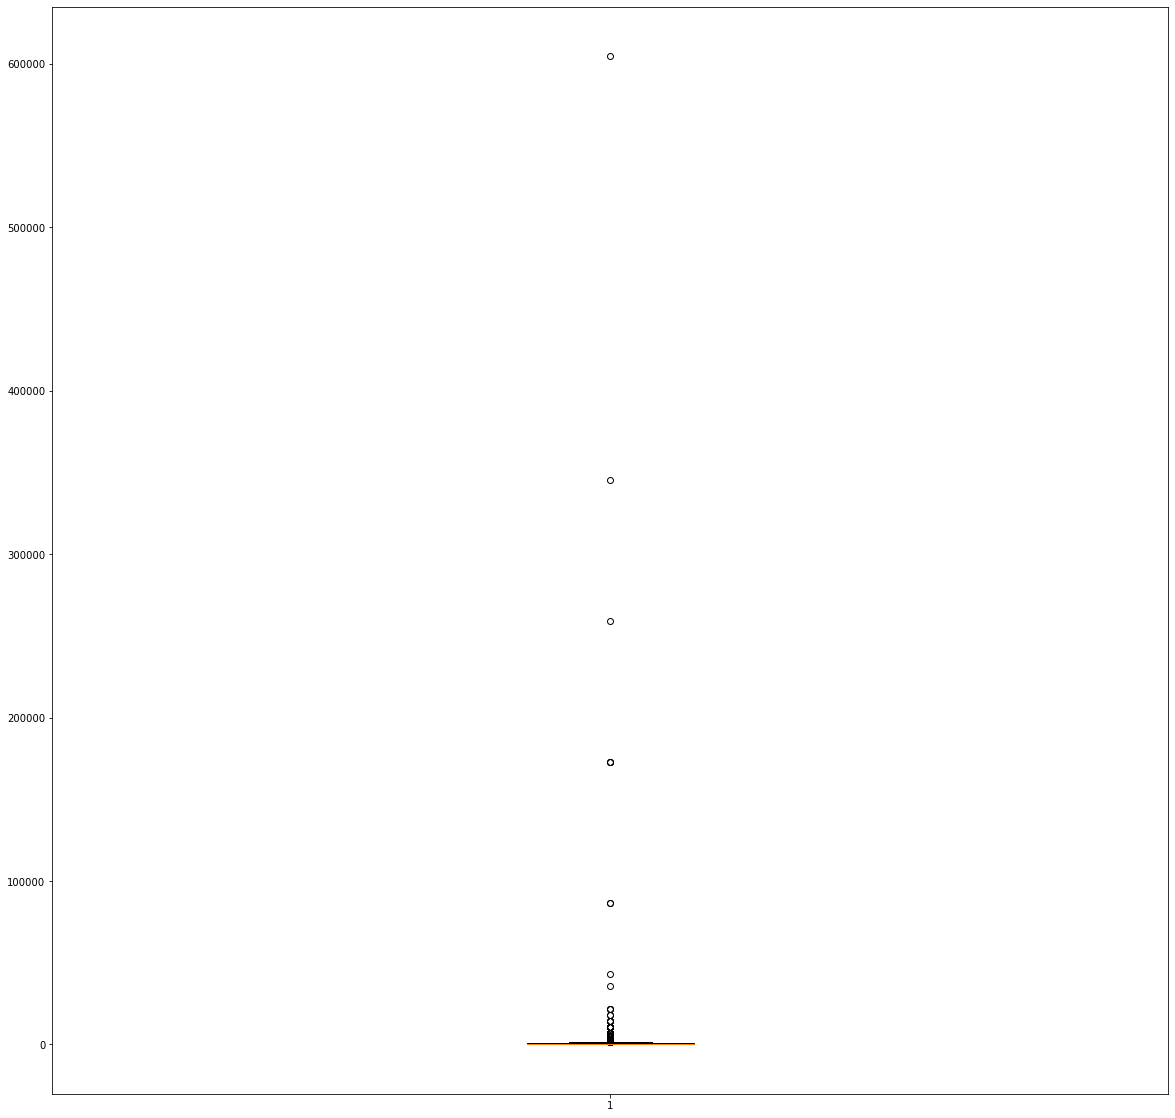


count      4266.000000
mean        964.643940
std       16071.110273
min           0.500000
25%          15.000000
50%         120.000000
75%         600.000000
max      604800.000000
Name: Time, dtype: float64


In [2240]:
# report the basic statistics of duration in your cleaned dataset
# draw a boxplot for your cleaned dataset

import matplotlib.pyplot as plt
import statistics

print('Maximum duration:',float(max(time)) )
print('Minimum duration:',float(min(time)) )
print('Mean duration:',statistics.mean(time) )
print('Standard Deviation:',statistics.stdev(time) )
print('Median:',statistics.median(time))

# boxplot code here
plt.figure(figsize=(20,20))
plt.boxplot(durations)

#plt.ylim(0,4000)
plt.show()
print()

print(dataClean['Time'].describe())

Now, introduce your cleaning process step by step and explain the reason behind your steps. Then, revisit your two boxplots -- for the initial "valid" dataset and then for your cleaned dataset. What do you observe? What differences does cleaning have? Would you imagine your downstream analyses would be affected by this cleaning step? Explain.

### Cleaning Process
#### I have cleaned my data to capture cases such as the ones shown below as valid entries:
- 1 day
- 'approx'/'about'/'>'/'<'/'~' 1 min
- 1-3min (Stored as the average of the range)
- 1min -3min (Stored as the average of the range)
- 00:04:56
- 30 plus mins (Stored as 30 mins)
- 1:00 mins
- 4.5mins
- ten secs, half hour (convert to 10 secs, 0.5 hours)
- I viewed for 2 hours (extract 2 hours)
- 1 hour & 45 mins (Stored as sum)
- 1 or 2 minutes (Stored as the average of the range)
- 30 plus minutes
- 6 hrs+
- 20 secs?
- 15/20 sec. (Stored as the average of the range)

#### Some known cases that haven't been handled or are not considered valid entries:
- Empty Cells/NaN
- Cells that contain 'Unknown'
- Entries that had no units
- 7:13 to 8:30 
    Since the numbers are not followed by am/pm, I wasn't sure whether I should count them as timestamps or numbers(7.13 to 8.30). 
    - Number case: No units present. Therefore, classified as invalid entry
    - Timestamp: Still ambiguous. Could be (7:13am to 8:30pm) or (7:13pm to 8:30pm)
- 10 20 sec
    Could be any of these: 1020sec or 10-20sec or 10min-20sec.  
- few minute (maybe 2-3)
    Cases like this one are hard to predict. Therefore, designing a regular expression to catch such a case is difficult.

### Boxplot Analyses

'Valid' Data
count      2540.000000
mean       1528.982283
std       16169.223413
min           1.000000
25%          20.000000
50%         120.000000
75%         600.000000
max      604800.000000

Cleaned Data
count      4266.000000
mean        964.643940
std       16071.110273
min           0.500000
25%          15.000000
50%         120.000000
75%         600.000000
max      604800.000000

- I was losing 40.45% of valuable entries because of formatting incosistency in 'valid dataset'.

- In 'valid' data, there were lesser entries with small durations such as 1-5 seconds when compared to the cleaned dataset. This is indicated by the '25%' quartile measure. The 'valid' data has a greater '25%' quartile value.

- With an increase in the number of entries and maybe addition of shorter durations, the mean has significantly dropped. However, the standard deviation remains consistent.

- Values for the 50% quartile, 70% quartile and max remains the same. 



### Would you imagine your downstream analyses would be affected by this cleaning step?

Yes, cleaning would definitely improve my analysis. With cleaning we reduce loss of data, inaccuracy and redundancy while making it more usable/uniform!



## (10 points) Part 1d: Probe This, you Alien Invaders.
Finally, let's begin our initial analysis of the cleaned UFO dataset. In this section, we're going to do some plotting with matplotlib and draw some initial conclusions that may guide our future study of this UFO dataset. 

Question 1: Which **shapes** are most observed?

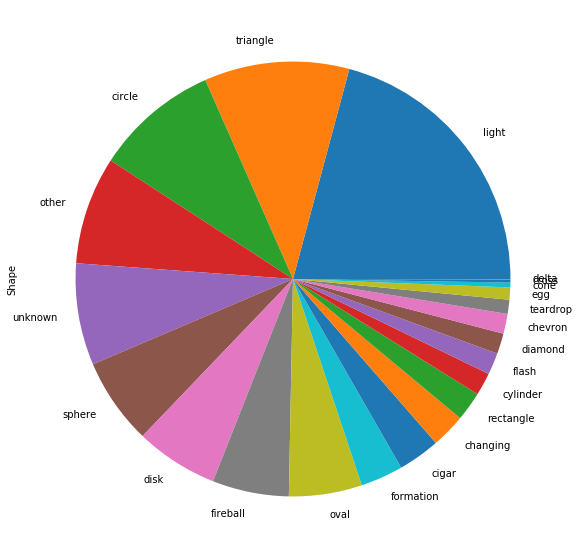

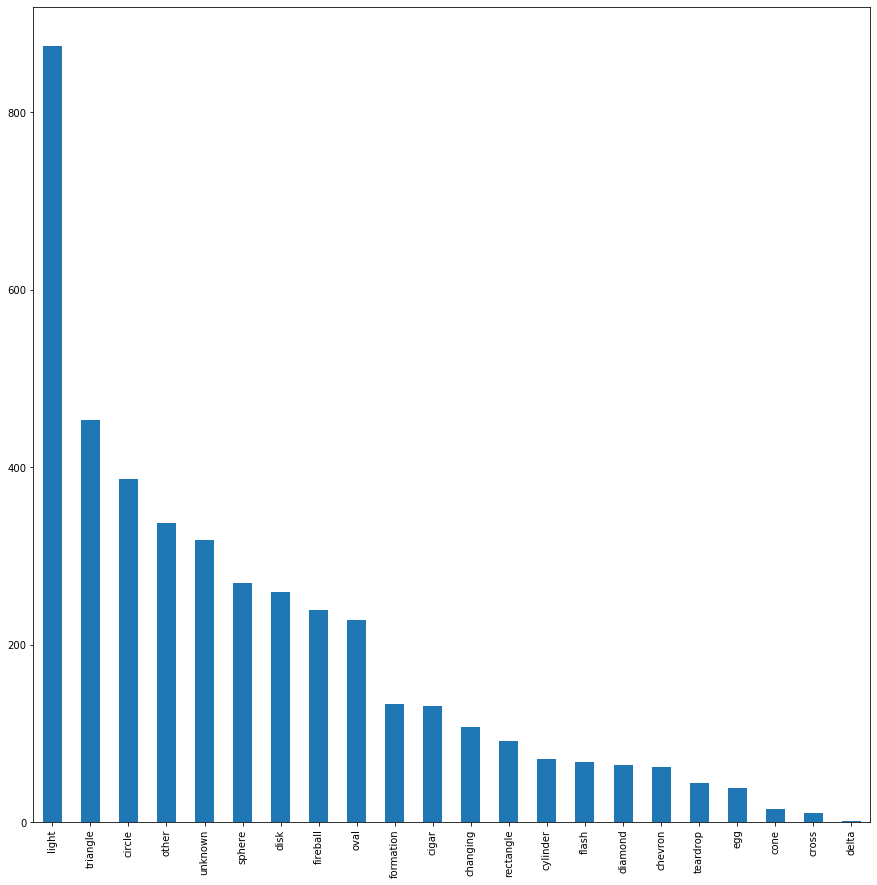

In [2227]:

# create a plot of shapes (your choice of what you consider the appropriate plot)
import matplotlib.pyplot as plt

l = dataClean['Shape'].str.lower().value_counts()

plt.figure(figsize=(10,10))
l.plot.pie()
plt.show()

plt.figure(figsize=(15,15))
l.plot.bar()
plt.show()



Question 2: Do different UFO shapes have different durations?

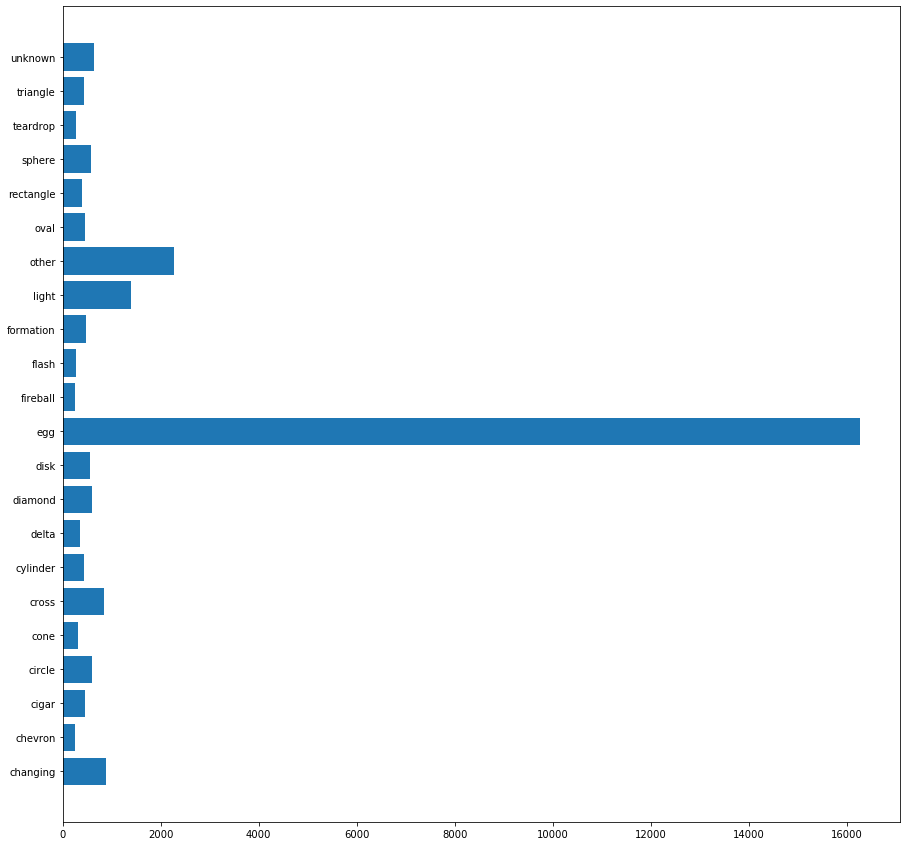

In [2228]:
dataClean['Time'] = time

dataClean['Shape'] = dataClean['Shape'].str.lower()
shapes = dataClean.groupby('Shape')['Time'].mean()
D = dict(shapes)
plt.figure(figsize=(15,15))
plt.barh(*zip(*D.items()))
plt.show()

Question 3: Are there more UFO sightings in recent years than in the past?

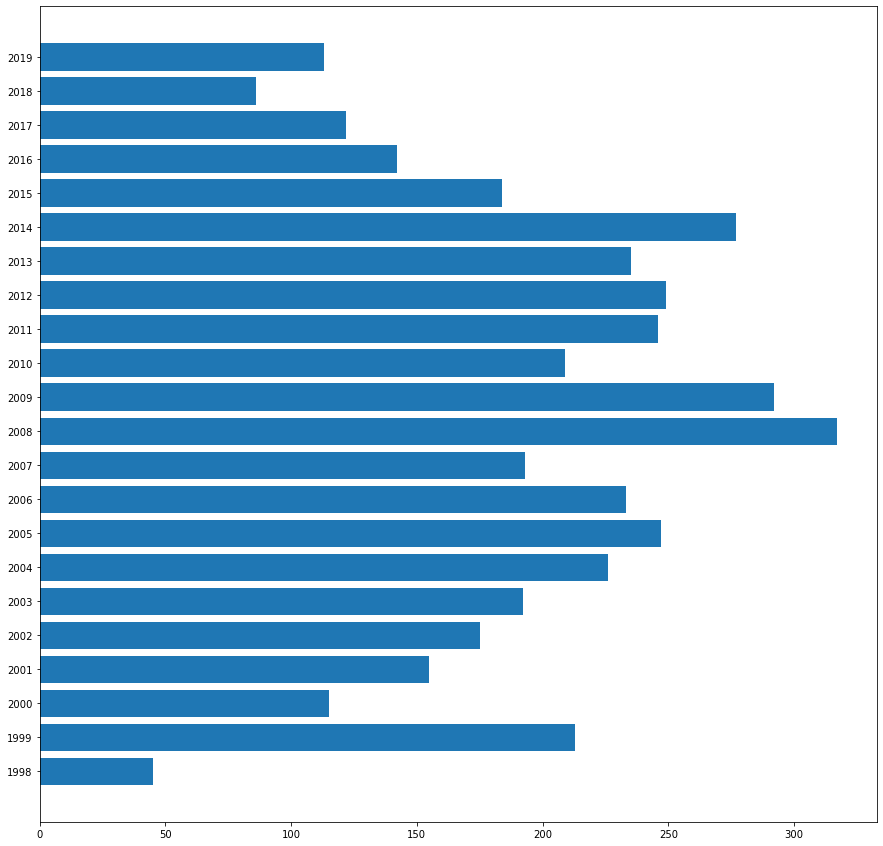

In [2229]:
# your code here
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
dataClean['Posted'] = pd.to_datetime(dataClean['Posted'],errors='coerce')
dataClean['Year'] = dataClean['Posted'].map(lambda x:x.strftime('%Y'))

yearDF=dataClean.groupby('Year').size()

Y = dict(yearDF)
plt.figure(figsize=(15,15))
plt.barh(*zip(*Y.items()))
plt.show()

Question 4: Based on your observations and analyses, what are some important next steps we should take?

#### Next Steps:

I would suggest focusing on UFO sightings in the entries from 2003 to 2015. The number of entries during this period has been fairly consistent and therefore, finding most common UFO shapes or avergae time of oservation might be more useful in the 'UFO study'. 

Additionally, it would be interesting to see which places/cities have the experienced the most activity: (year,places), (shapes,places). Maybe these sightings could also be attributed to landscapes, climate, education background of its residents, etc.




## (40 points) Part 2: Association Rules in Movie Rating Behaviors
In this part, we are going to leave the study of UFOs behind us. Now we are going to examine movies using our understanding of association rules. For this part, you need to implement the apriori algorithm, and apply it to a movie rating dataset to find association rules of user movie rating behaviors. First, run the next cell to load the dataset we are going to use.

In [2230]:
# First load the dataset
import pandas as pd
movie_rating_df = pd.read_csv('./movie_rated.csv')
movie_rating_df.head()

,userId,movieId
0,1,2160
1,1,2312
2,1,144
3,1,480
4,2,2160


In this dataset, there are two columns: userId is the integer ids of users, and movieId is the integer ids of movies. Each row denotes that the user of given userId rated the movie of the given movieId. We are going to treat each user as a "basket", so you will need to collect all the movies that have been rated by a single user as a basket. 

Now, you need to implement the apriori algorithm and apply it to this dataset to find association rules of user rating behaviors with **minimum support of 0.2** and **minimum confidence of 0.8**. We know there are many existing implementations of apriori online (check github for some good starting points). You are welcome to read existing codebases and let that inform your approach. Do not copy-paste any existing code. We want your code to have sufficient comments to explain your steps, to show us that you really know what you are doing. Furthermore, you should add print statements to print out the intermediate steps of your method -- e.g., the size of the candidate set at each step of the method, the size of the filtered set, and any other important information you think will highlight the method. 

In [2231]:
user2movie = {}
movie2user = {}
movie2support = []

for index,row in movie_rating_df.iterrows():
    if row['userId'] in user2movie:
        user2movie[row['userId']].append(row['movieId'])
    else:
        user2movie[row['userId']] = [row['movieId']]
    if row['movieId'] in movie2user:
        movie2user[row['movieId']].append([row['userId']])
    else:
        movie2user[row['movieId']] = [row['userId']]
        
for key,val in movie2user.items():
    sup = float(len(movie2user[key])/len(user2movie))
    tup = ([key], sup,0)
    #save this as a list of tuples
    movie2support.append(tup)
    

In [2232]:
import copy

def Union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

def findSup(intersection,user2movies):
    baskets = 0 #total number of baskets in which itemset is found
    for key,val in user2movies.items():
        list1 = val
        list2 = list(intersection)
        flag = 0
        #check if list1 contains all elements in list2
        for i in range(len(list2)):
            if list2[i] not in list1:
                flag = 1
        #if yes, add this basket
        if flag==0:
            baskets+=1 
    return float(baskets/len(user2movie)),baskets #return support for this itemset
   
def joinandPrune(supTable,k,minsup,user2movies):
    elemCommon = k-2 #Number of elements that it should have in common to join with that itemset
    joinedTable = []
    seenUnions = [] # to avoid already seen itemsets
    for i in range(len(supTable)):
        for j in range(len(supTable)):
            k1= supTable[i][0]
            k2= supTable[j][0]
            if (k1!=k2):
                intersection1 = intersection(k1,k2) # find intersection of 2 itemsets
                uni = Union(k1,k2) # find union of the 2 itemsets
                sortedUni = sorted(uni)
                if(len(intersection1)>= elemCommon and len(sortedUni)==k and sortedUni not in seenUnions):
                    seenUnions.append(sortedUni)
                    newSupport,baskets = findSup(sortedUni,user2movies)
                    if minsup < newSupport:
                        t=(sortedUni,newSupport,baskets)
                        joinedTable.append(t)
    return joinedTable

In [2233]:
def aprioriAlgo(minsup, supTable1, user2movies):
    k=1
    mastersetItemsets = []
    length = len(supTable1)
    supTable = copy.deepcopy(supTable1)
    while length>0:
        if k==1:
            print("For k:",k)
            print("Before pruning we have", length,"itemsets")
            supTable = [x for x in supTable if  (x[1]>=minsup)]
            print("After pruning we have", len(supTable),"itemsets")
            print()          
        else:
            print("For k:",k)
            print("Before pruning we have", length,"itemsets")
            #We join itemsets and then returned pruned table
            supTable = joinandPrune(supTable, k, minsup, user2movies)
            print("After pruning we have", len(supTable),"itemsets")
            print()
        for i in range(len(supTable)):
            mastersetItemsets.append((supTable[i][0], supTable[i][1],supTable[i][2]))
        length = len(supTable)
        k+=1
    return mastersetItemsets
        

In [2234]:
movie2supportCopy = copy.deepcopy(movie2support)

minsup = 0.2
minconf = 0.8

a = aprioriAlgo(minsup, movie2support,user2movie)

For k: 1
Before pruning we have 408 itemsets
After pruning we have 21 itemsets

For k: 2
Before pruning we have 21 itemsets
After pruning we have 36 itemsets

For k: 3
Before pruning we have 36 itemsets
After pruning we have 12 itemsets

For k: 4
Before pruning we have 12 itemsets
After pruning we have 0 itemsets



In [2235]:
import itertools

def sub_lists(list1): 
    sublist = [[]] 
    for i in range(len(list1) + 1): 
        for j in range(i + 1, len(list1) + 1):  
            sub = list1[i:j] 
            sublist.append(sub) 
    return sublist

def findIndex(ele,a):
    count=0
    for x in a:
        if x[0] == ele:
            return count
        count+=1
        
def getAssociationRules(a,minconf):     
    ans=[]
    for i in range(len(a)):
        sublists = []
        if len(a[i]) ==1 :
            continue
        for L in range(1, len(a[i][0])):
            sublists.extend(list(map(list,itertools.combinations(a[i][0], L))))
        for x in sublists:
            if len(x)>0:
                sorted(x)
                index =  findIndex(x,a)
                conf = float(a[i][1]/a[index][1])
                if(conf>=minconf):
                    ans.append((a[i][0],a[index][0]))
    return ans

In [2236]:
rules = getAssociationRules(a,0.8)
print("Total number of association rules found:",len(rules))

Total number of association rules found: 14


In [2237]:
rules

[([858, 1221], [1221]),
 ([260, 1387], [1387]),
 ([260, 480, 1270], [480, 1270]),
 ([260, 480, 1197], [480, 1197]),
 ([260, 480, 2028], [480, 2028]),
 ([260, 858, 1221], [260, 1221]),
 ([260, 858, 1221], [858, 1221]),
 ([1197, 1265, 1270], [1197, 1265]),
 ([260, 1265, 1270], [260, 1265]),
 ([260, 1197, 1270], [260, 1197]),
 ([260, 1197, 1270], [1197, 1270]),
 ([260, 527, 1270], [527, 1270]),
 ([260, 1270, 2028], [1270, 2028]),
 ([260, 1197, 2028], [1197, 2028])]

Finally, print your final association rules in the following format:

**movie_name_1, movie_name_2, ... --> movie_name_k**

where the movie names can be fetched by joining the movieId with the file 'movies.dat'. For example, one rule that you should find is:

**Jurassic Park (1993), Back to the Future (1985) --> Star Wars: Episode IV - A New Hope (1977)**


In [2238]:
# just the rules
import io
dic ={}

#Read the dat file; covert it to a dictionary --> key:movieId, value:movieName
for line in io.open("movies.dat", encoding="ISO-8859-1"):
    a = line.split('::')
    key = a[0]
    val = a[1]
    dic[key]=val

In [2239]:
def Diff(li1, li2): 
    return (list(set(li1) - set(li2))) 

def to_str(var):
    return str(list(np.reshape(np.asarray(var), (1, np.size(var)))[0]))[1:-1]

for tup in rules:
    a=tup[0]
    b=tup[1]
    c = Diff(a,b)
    d = Diff(a,c)
    e = []
    f = []
    for entry in d:
        e.append(dic[to_str(entry)])
    for entry in c:
        f.append(dic[to_str(entry)])
    print(e,'->',f)
    #print(d,'->',c)
    print()
    print()


['Godfather: Part II, The (1974)'] -> ['Godfather, The (1972)']


['Jaws (1975)'] -> ['Star Wars: Episode IV - A New Hope (1977)']


['Jurassic Park (1993)', 'Back to the Future (1985)'] -> ['Star Wars: Episode IV - A New Hope (1977)']


['Jurassic Park (1993)', 'Princess Bride, The (1987)'] -> ['Star Wars: Episode IV - A New Hope (1977)']


['Jurassic Park (1993)', 'Saving Private Ryan (1998)'] -> ['Star Wars: Episode IV - A New Hope (1977)']


['Star Wars: Episode IV - A New Hope (1977)', 'Godfather: Part II, The (1974)'] -> ['Godfather, The (1972)']


['Godfather, The (1972)', 'Godfather: Part II, The (1974)'] -> ['Star Wars: Episode IV - A New Hope (1977)']


['Groundhog Day (1993)', 'Princess Bride, The (1987)'] -> ['Back to the Future (1985)']


['Groundhog Day (1993)', 'Star Wars: Episode IV - A New Hope (1977)'] -> ['Back to the Future (1985)']


['Star Wars: Episode IV - A New Hope (1977)', 'Princess Bride, The (1987)'] -> ['Back to the Future (1985)']


['Princess Bride, The 

## (5 points) BONUS

Finally, we'll set aside a few bonus points (like 1-5) for any improvement for the apriori algorithm, such as the SON algorithm or Toivonen’s algorithm. Specify the algorithm you are implementing, apply it to the same dataset we used above and report the results, and discuss how this algorithm is different from the conventional apriori algorithm.

In [ ]:
## your code here